In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import os
import pandas as pd

from tqdm import tqdm

from utils.db_util import create_postgres_engine, make_query
from utils.query_util import query_person_info_in_organization

In [4]:
db_conn = create_postgres_engine()

In [15]:
q = """
SELECT char_length, word_length
FROM
	linkedin.person_meta meta
JOIN (
	SELECT *
	FROM linkedin.location_country
	WHERE country IN ('US', 'Canada')
) q
	ON meta.header_location = q.header_location

JOIN linkedin.person_summary_length
	ON person_summary_length.person_id = meta.person_id
	
WHERE word_length >= 50
"""

In [16]:
count_stat_df = make_query(q, db_conn)

In [17]:
count_stat_df.shape

(5338764, 2)

In [18]:
count_stat_df.head()

,char_length,word_length
0,381,75
1,1926,317
2,705,131
3,247,50
4,487,77


Text(0.5, 1.0, 'word_length')

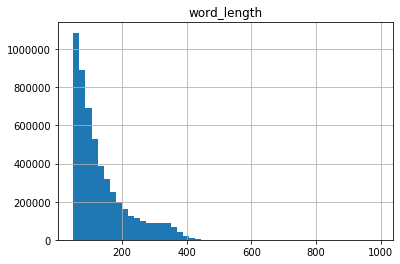

In [26]:
count_stat_df['word_length'].hist(bins=50,
                                  )
plt.title('word_length')